<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/Tutos_graphs_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial created with youtube vidéo : https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Pour obtenir la liste des datasets intégrés à Seaborn

In [ ]:
sns.get_dataset_names()

### Pour charger un dataset dans la base Seaborn, il faut utiliser la commande .load_dataset('')

In [3]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


##Distribution Plot

https://seaborn.pydata.org/generated/seaborn.distplot.html

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


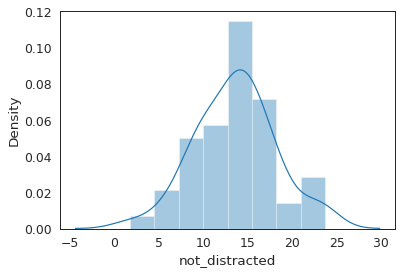

In [52]:
# Quand on appelle un graph, il faut bien regarder la documentation fournie après les (), sinon on va sur le lien ci-dessus

# Avec le displot, Là j'obtiens les accidents dans lesquels les personnes n'étaient pas distraites
sns.distplot(crash_df['not_distracted'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


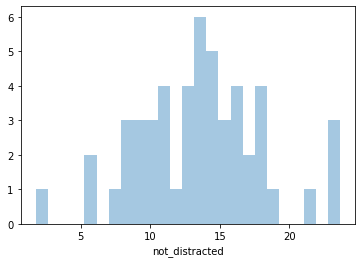

In [5]:
# Si je ne veux pas de ligne de densité du noyau des accidents, il suffit de mettre kde= False
# par défaut bins se gère seul, une règle de référence est utilisée pour essayer de trouver une valeur par défaut utile. Sinon on met ce qu'on veut

sns.distplot(crash_df['not_distracted'], kde = False, bins=25)


## Join Plot

https://seaborn.pydata.org/generated/seaborn.jointplot.html

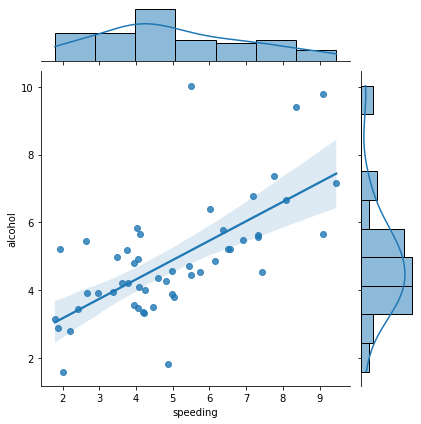

In [6]:
#Avec un jointplot, en axis la vitesse et en ordonnée l'alcool. Le df est crash_df et on a tracé une ligne de regression avec kind='reg
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

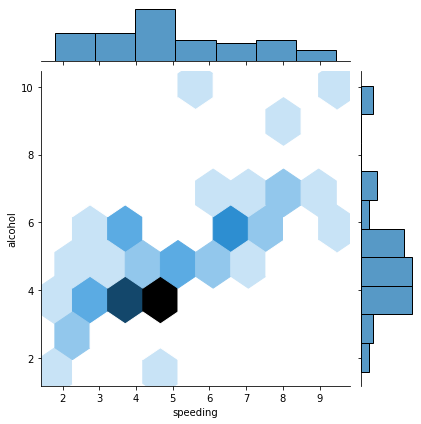

In [7]:
# On peut aussi changer la forme du tracé : (kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }) => cf docu lien ci-dessus

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

## KDE Plot
https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot



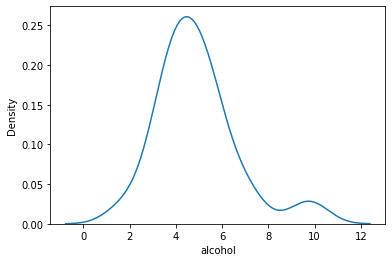

In [8]:
# ici on peut voir les accident liés à la consommation d'alcool
sns.kdeplot(crash_df['alcohol'])

##Pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

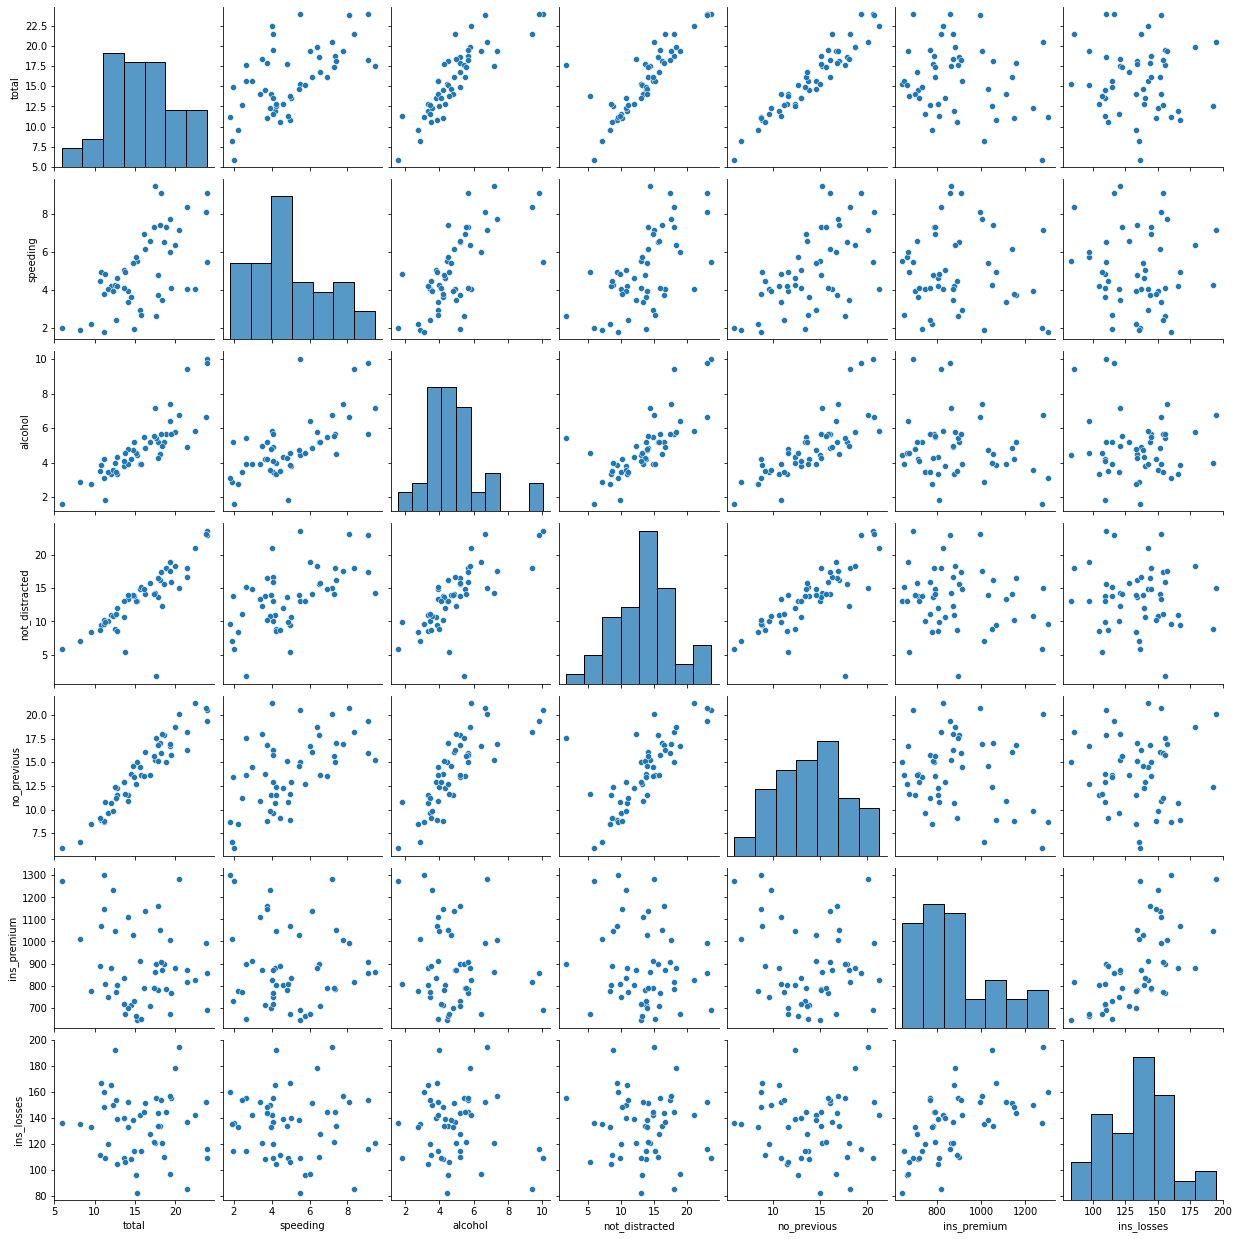

In [9]:
# on va afficher tous les graph de toutes les données croisées

sns.pairplot(crash_df)

## Avec un autre dataset 'tips'

In [10]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


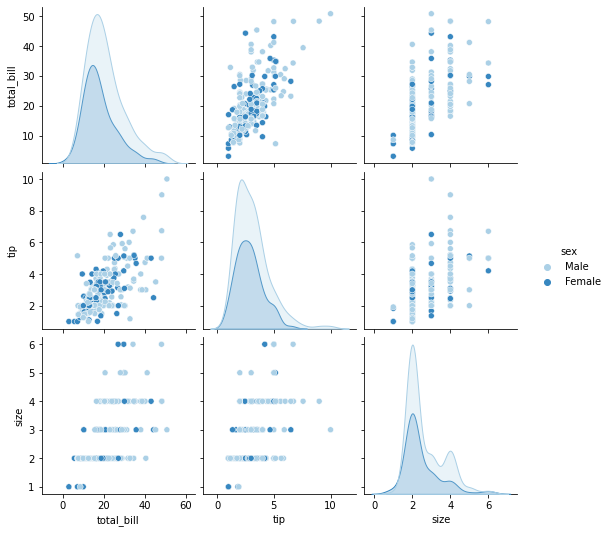

In [11]:
# Analyse de toutes les données croisées basées sur le sex des personnes,le HUE permet de donner des données catégoriques et les teinter
sns.pairplot(tips_df, hue='sex', palette='Blues')

## Styling

https://seaborn.pydata.org/generated/seaborn.set_style.html?highlight=set_style#seaborn.set_style



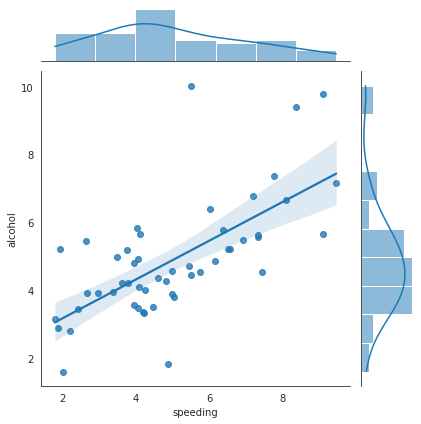

<Figure size 576x288 with 0 Axes>

In [12]:
# darkgrid, whitegrid, dark, white, ticks, à essayer
sns.set_style('white')

#on reprend notre graph du départ
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# on peut changer la taille 
plt.figure(figsize = (8,4))

# Changer la taille des étiquettes de la police etc... : The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”
sns.set_context('paper', font_scale=1.5)



#Categorical Plots
##Bar Plots
https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=bar%20plots

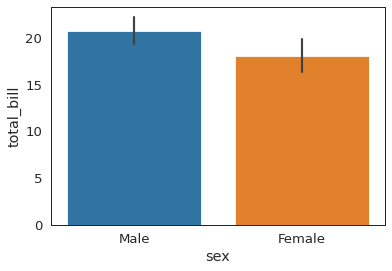

In [13]:
# Pour obtenir le montant des factures en fonction du sexe de la personne

sns.barplot(x='sex', y='total_bill', data=tips_df)

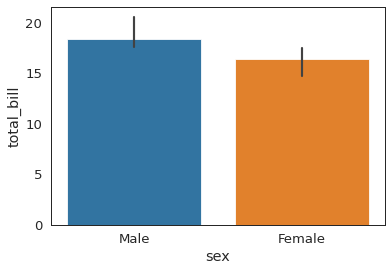

In [14]:
# on peut  modifier l'estimation des données en insérant des formules avec numpy, on peut faire ce qu'on veut comme fonction

sns.barplot(x='sex', y='total_bill', data=tips_df, estimator = np.median)

## Count Plot = Va compter le nombre d'occurences
https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=count%20plot#seaborn.countplot

In [15]:
# je rappelle mon dataset
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


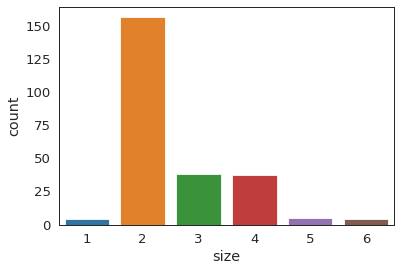

In [16]:
 #Ainsi je peux compter le nombre de couverts par table
 
 sns.countplot(x='size', data =tips_df)

##Box Plot
https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

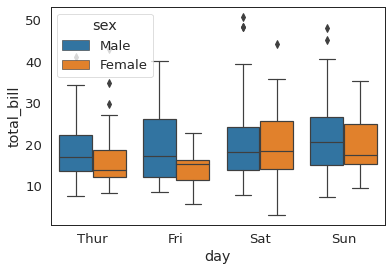

In [17]:
#On va regarder comment la facture change en fonction du jour et dans les données catégoriques liées au sexe

sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

#on peut remarquer que les hommes ont tendance à plus dépenser le vendredi que les autres jours.
#Pour les femmes c'est plutôt le weekend

##Déplacer la légende 
https://matplotlib.org/stable/api/legend_api.html?highlight=legend#module-matplotlib.legend

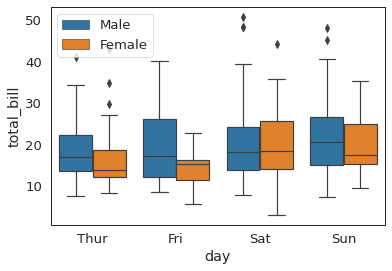

In [18]:
# loc = soit avec location code (de 0 à 10) soir avec Location String	: upper left, center ...

#rappel du graph
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

plt.legend(loc='upper left')

### La taille du graph : Algo à placer avant le graph
De base c'est en inches


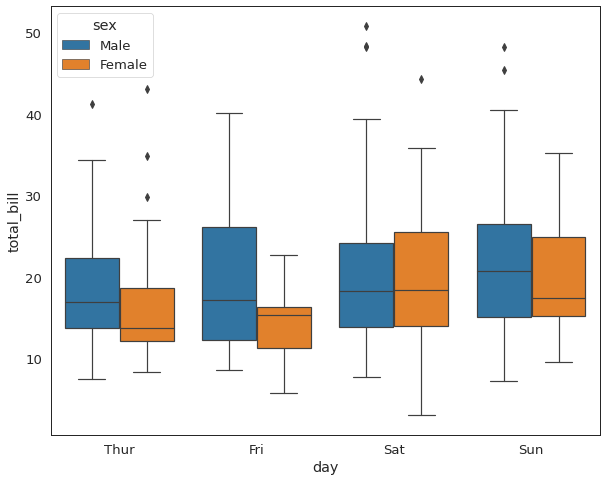

In [19]:
#Pour le transformer en cm sinon c'est en Inches
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(25*cm, 20*cm))


#rappel du graph
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

## Violin Plot
https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot


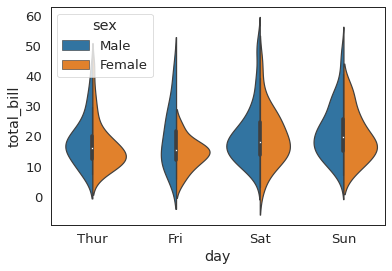

In [20]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split= True)

#On peut comparer les catégories entres elles en rajoutant split= True


## Strip Plot : S'utilise souvent avec une boxplot
https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot


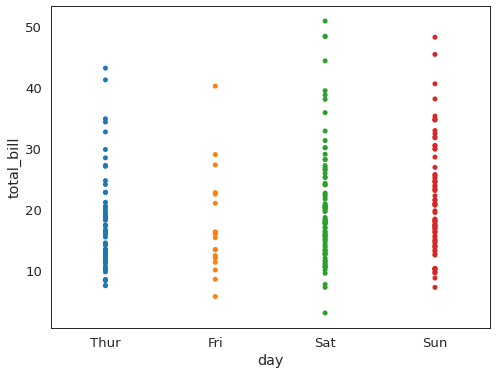

In [21]:
#Pour le transformer en cm sinon c'est en Inches
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(20*cm, 15*cm))

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter= False) #jitter permet de disperser les points, par défaut c'est True



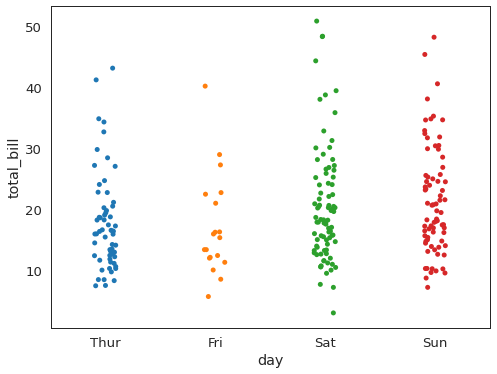

In [22]:
#Pour le transformer en cm sinon c'est en Inches
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(20*cm, 15*cm))

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter= True)

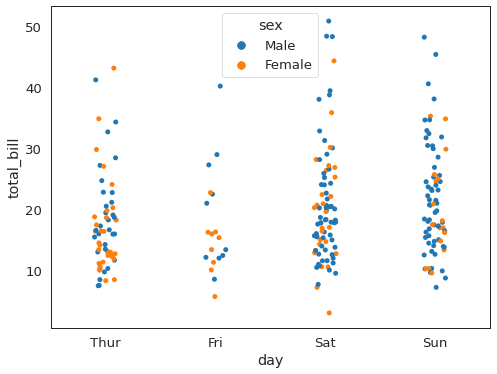

In [23]:
#Pour le transformer en cm sinon c'est en Inches
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(20*cm, 15*cm))

#Si on veut séparer nos données avec la colonne sexe mais sur la même colonne (point mélangés) :
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter= True, hue='sex')

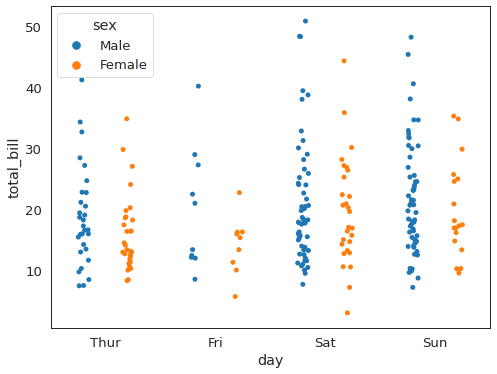

In [24]:
#Pour le transformer en cm sinon c'est en Inches
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(20*cm, 15*cm))

#Si on veut séparer nos données avec la colonne sexe mais sur deux colonnes séparées (point non mélangés), on rajoute dodge = True :
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter= True, hue='sex', dodge=True)

### Swarm Plot
S'utilise avec violinplot ou seul

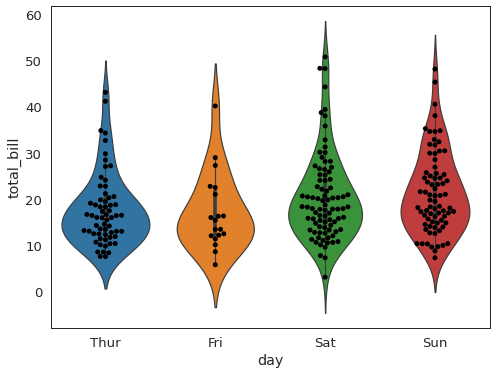

In [25]:
#Pour le transformer en cm sinon c'est en Inches
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(20*cm, 15*cm))

sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='black') #=> Il faut rajouter une oculeur sinon ils seront de la même couleur que le graph et donc invisible

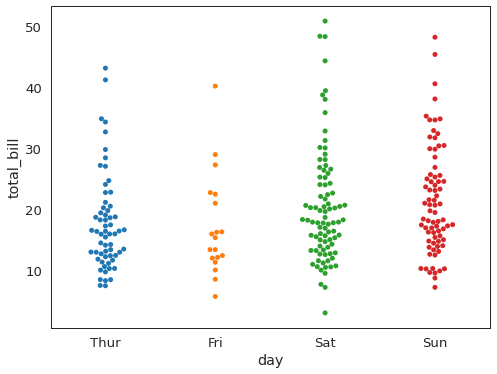

In [26]:
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(20*cm, 15*cm))

#en utilisation seule
sns.swarmplot(x='day', y='total_bill', data=tips_df)


## Les palettes

Colormap = https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html

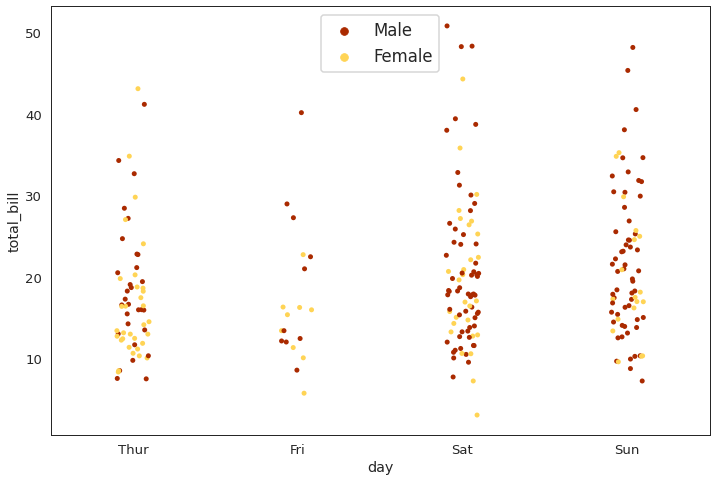

In [27]:
# taille
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(30*cm, 20*cm))

# Graph
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')

# Style
sns.set_style('white')

#context (voir plus haut)
sns.set_context('talk')

#déplacer la légende
plt.legend(loc=9)



#Tracés matriciels

##Heatmaps
https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap


#1ère façon de faire

In [28]:
#rappel dataset
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


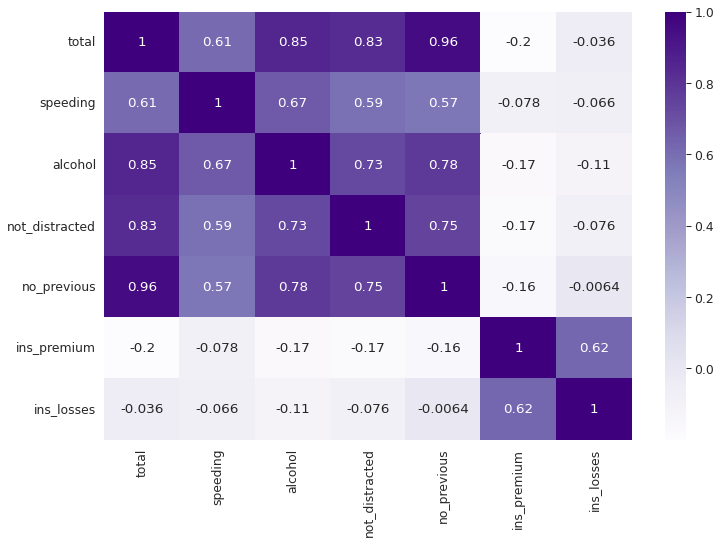

In [29]:
# taille
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(30*cm, 20*cm))

#context
sns.set_context('paper', font_scale = 1.4)

#création de la table matricielle : CAD qu'il faut que les données sur les colonnes : total	speeding	alcohol... se retrouvent sur les ordonnées aussi (index)
crash_matrix = crash_df.corr() #(on se sert du coeff de corrélation)
crash_matrix

#cration heatmap : annot permet de mettre les valeurs à l'intérieur, cmpa c'est la couleur : cf choosing colormap ci-dessus
sns.heatmap(crash_matrix, annot=True, cmap='Purples')


#2ème façon de faire en créent un pivot table, pour cla nous devons changer de dataset

In [30]:

flights = sns.load_dataset('flights')
flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [31]:
#création du pivot table : Mois sur la gauche, années sur les colonne, et données passagers en valeurs
flights2 = flights.pivot_table(index='month', columns='year', values='passengers')
flights2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


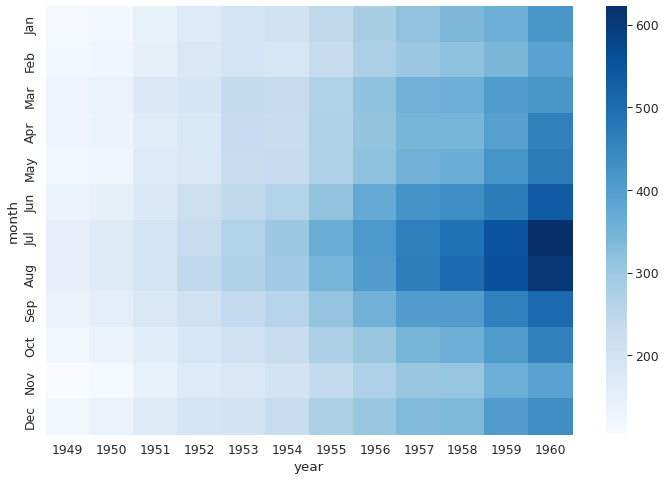

In [32]:
# taille
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(30*cm, 20*cm))

#création du heatmap
sns.heatmap(flights2,cmap='Blues')

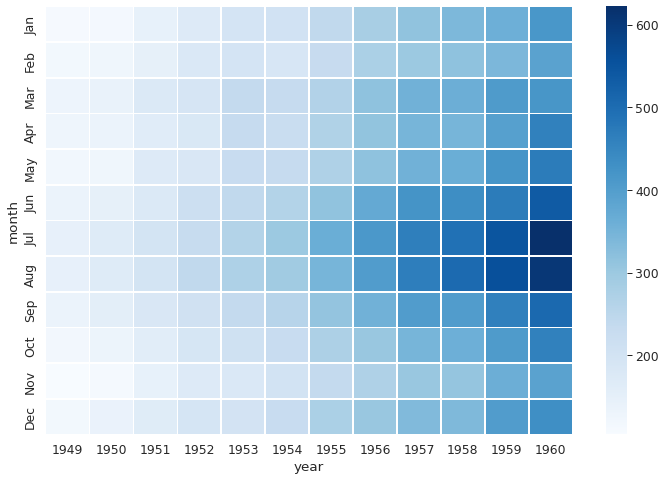

In [33]:
# taille
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(30*cm, 20*cm))

#pour plus de lisibilité on va mettre des lignes à l'intérieur
sns.heatmap(flights2,cmap='Blues', linecolor='white', linewidth=0.5)

##Cluster map
https://seaborn.pydata.org/generated/seaborn.clustermap.html?highlight=clustermap#seaborn.clustermap

In [34]:
#appel du dataset
flights2.head(5)


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


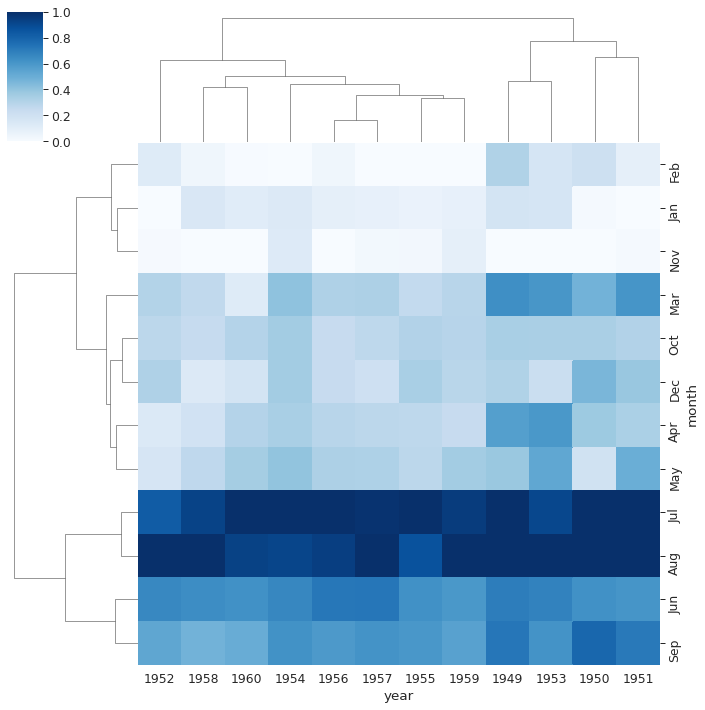

In [35]:
#création du clustermap => Standard_scale va normaliser les données (0 ou 1)
sns.clustermap(flights2, cmap='Blues', standard_scale=1)

#on peut voir que le graphique se concentre sur les données et pas les axes qui ne sont plus dans l'ordre


## Pair-Grid
https://seaborn.pydata.org/generated/seaborn.PairGrid.html?highlight=pairgrid#seaborn.PairGrid

In [36]:
#ressemble aux pairplots.

#appel de la dataset
iris = sns.load_dataset('iris')
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


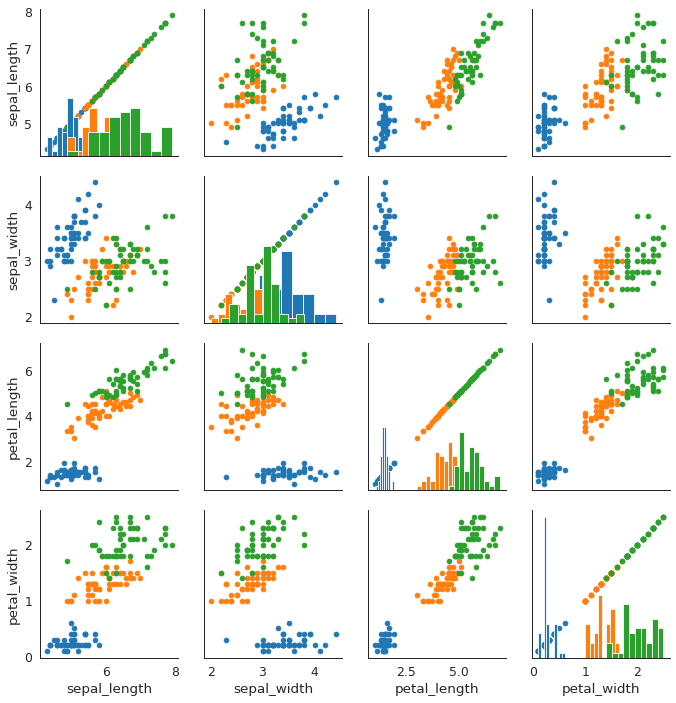

In [37]:
#on commence par créer un sytème de grilles vides, on va réutiliser la dataset iris
iris_g = sns.PairGrid(iris, hue='species')

#ensuite on va indiquer le style de graph que l'on veut
iris_g.map(plt.scatter)

#on peut changer le style de graph sur certains graph choisis (ici je choisis la diagonale)
iris_g.map_diag(plt.hist)

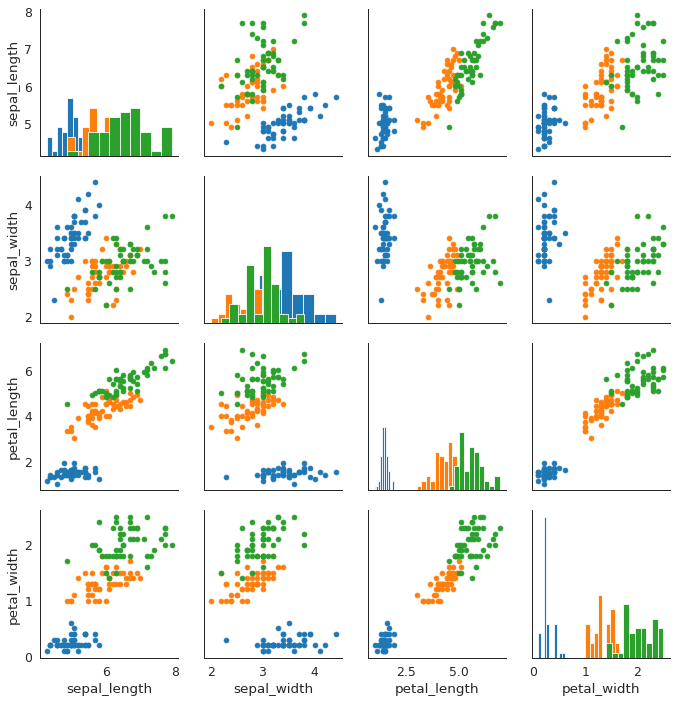

In [38]:
#autre exemple, si l'on veut afficher que hist et nuages de points sur des graphs différents

#on commence par créer un sytème de grilles vides, on va réutiliser la dataset iris
iris_g = sns.PairGrid(iris, hue='species')

#on peut changer le style de graph sur certains graph choisis (ici je choisis la diagonale)
iris_g.map_diag(plt.hist)

#des nuages de points en dehors de la diagonale
iris_g.map_offdiag(plt.scatter)



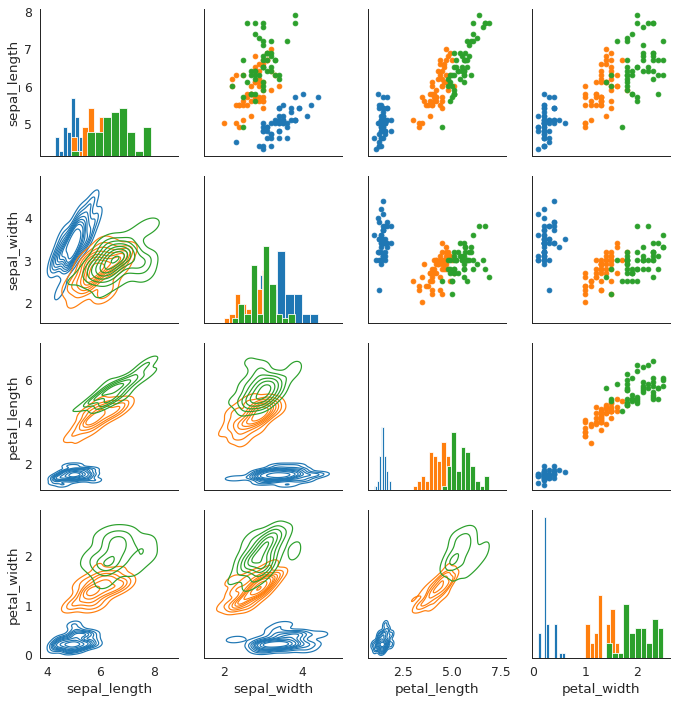

In [39]:
#La même chose partie supérieure et inférieure des graphs

#on commence par créer un sytème de grilles vides, on va réutiliser la dataset iris
iris_g = sns.PairGrid(iris, hue='species')

iris_g.map_diag(plt.hist)     #histogrammes sur diagonales
iris_g.map_upper(plt.scatter) #nuages de points en haut de la diag
iris_g.map_lower(sns.kdeplot) #kdeplot en bas de la diag



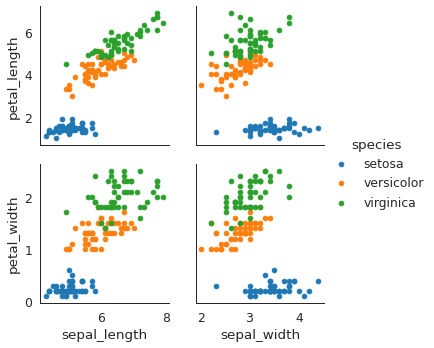

In [40]:
#si on veut réduire le graph en choississant nos abscises et nos ordonnées :

#on commence par créer un sytème de grilles vides, on va réutiliser la dataset iris
iris_g = sns.PairGrid(iris, hue='species',                        #pairgrid coloré par les valeurs de species
                      x_vars= ['sepal_length', 'sepal_width'],     #en abscisses on choisi 2 colonnes, pareil en ordonnées
                      y_vars= ['petal_length', 'petal_width'])

 # ensuite on choisit son type de graph au choix : nuages de points 
iris_g.map(plt.scatter)  

#ajout legende (ne pas oublier le add)
iris_g.add_legend()


## Facet Grid : Permets d'imprimer plusierus tracer dans une grille
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facet%20grid#seaborn.FacetGrid

In [41]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


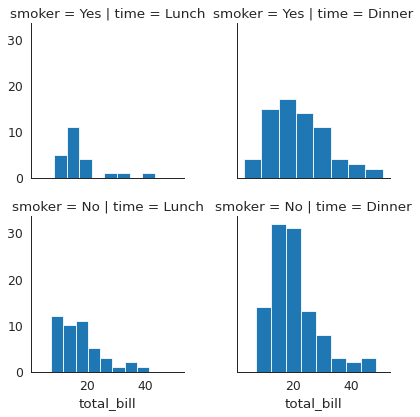

In [42]:
#on reprned la table tips
#on va créer des facet grid basés sur les fumeurs et le moment ou ils fument

#création des grilles avec colonne time et ligne smoker
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

#ensuite on créé le graph : histogrammes triés sur le montant de la facture
tips_fg.map(plt.hist, 'total_bill', bins=8)

#donc on a ! Les fumeurs ou non par dej et par dinner et les histogrammes représentent le montant de la facture.

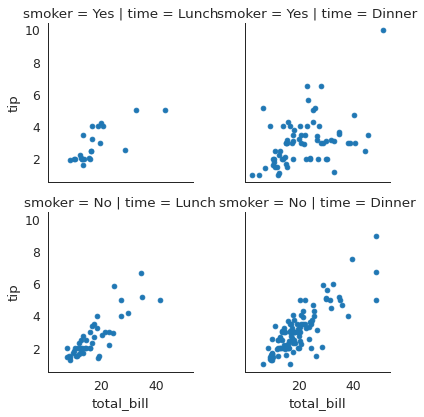

In [43]:
#on peut aussi le faire avec un nuage de points et prendre plusieurs données

#création des grilles avec colonne time et ligne smoker (ça ne change pas) => ici on indique le cadre de notre graph, il n'y a pas de valeurs 
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

#ensuite on créé le graph : nuages de points triés sur le montant de la facture et le tip
tips_fg.map(plt.scatter, 'total_bill', 'tip')

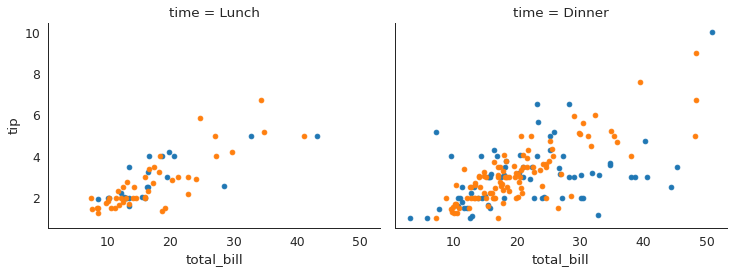

In [44]:
#autre test avec hue, heught et aspect

#création des grilles avec colonne time et ligne smoker (ça ne change pas) => ici on indique le cadre de notre graph, il n'y a pas de valeurs 
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3) #height c'est la hauteur et aspect c'est le rapport largeur/hauteur

#ensuite on créé le graph : nuages de points triés sur le montant de la facture et le tip
tips_fg.map(plt.scatter, 'total_bill', 'tip')


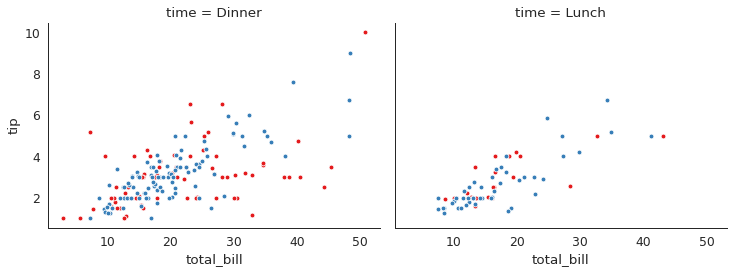

In [45]:
#again : par exemple je veux les dinner avant le lunch

#création des grilles avec colonne time et ligne smoker (ça ne change pas) => ici on indique le cadre de notre graph, il n'y a pas de valeurs 
#height c'est la hauteur et aspect c'est le rapport largeur/hauteur
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
                          col_order=['Dinner','Lunch'], palette='Set1')

#ensuite on créé le graph : nuages de points triés sur le montant de la facture et le tip
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w') #edgecolor c'est la couleur des bords des points


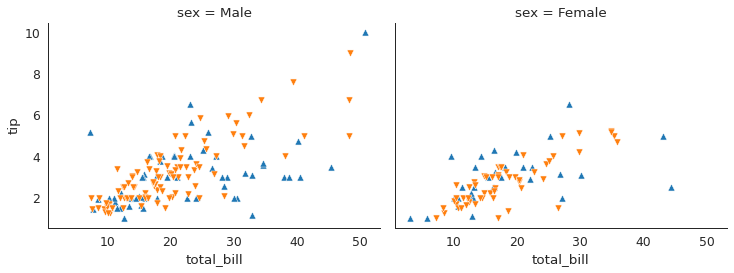

In [46]:
#Par exemple, si nous voulons changer les marqueurs, les couleurs.. on peut aussi cérer un dictionnaire qui prendr déjà certains paramètres en compte

#on créé un dictionnaire
kws = dict(s=50, linewidth=.5, edgecolor='w')

#création des grilles avec colonne time et ligne smoker (ça ne change pas) => ici on indique le cadre de notre graph, il n'y a pas de valeurs 
#height c'est la hauteur et aspect c'est le rapport largeur/hauteur, hue order c'est l'ordre de coloration et hus kws ce sont les marqueurs et leurs infos dans le dictionnaire créé
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                          hue_order=['Yes','No'],
                          hue_kws = dict(marker=['^','v']))

#ensuite on créé le graph : nuages de points triés sur le montant de la facture et le tip
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws) #** pour aguments


In [47]:
# with other table

att_df=sns.load_dataset('attention')
att_df.head(10)

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
5,5,6,divided,1,5.0
6,6,7,divided,1,5.0
7,7,8,divided,1,5.0
8,8,9,divided,1,2.0
9,9,10,divided,1,6.0


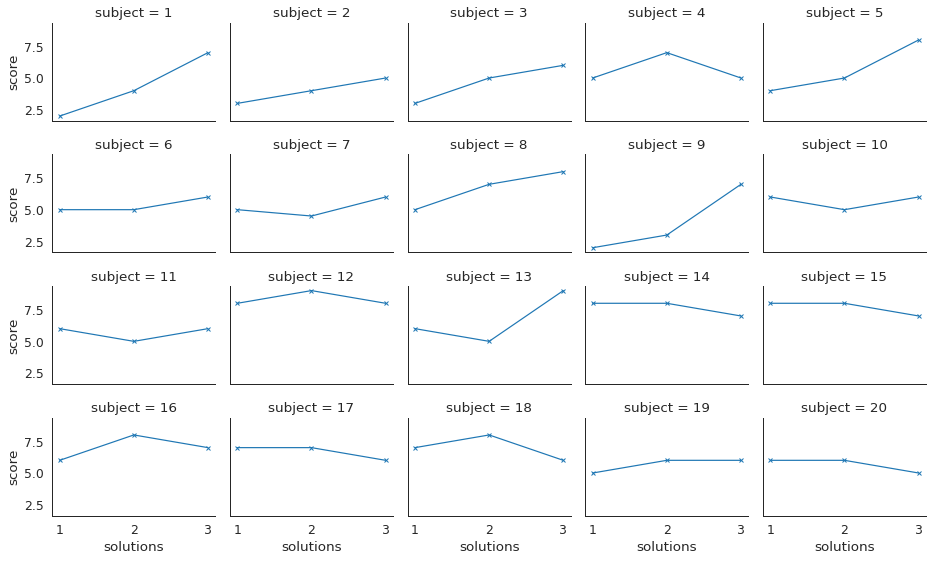

In [48]:
#création des grilles
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height =2, aspect=1.3) #col_wrap c'est le nombre lignes que l'on veut regrouper : 5 subject par ligne


#création du graph
att_fg.map(plt.plot, 'solutions', 'score', marker='x')

## Regression Plots
https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot

In [49]:
#on va réutiliser tips
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

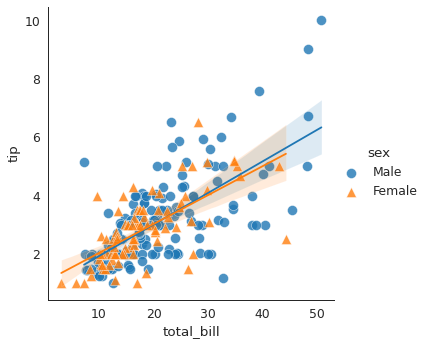

In [50]:
#taille

plt.figure(figsize=(8,6))

#contexte
sns.set_context('paper', font_scale=1.4)

#graph regression
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o','^'],
           scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor':'w'})
           

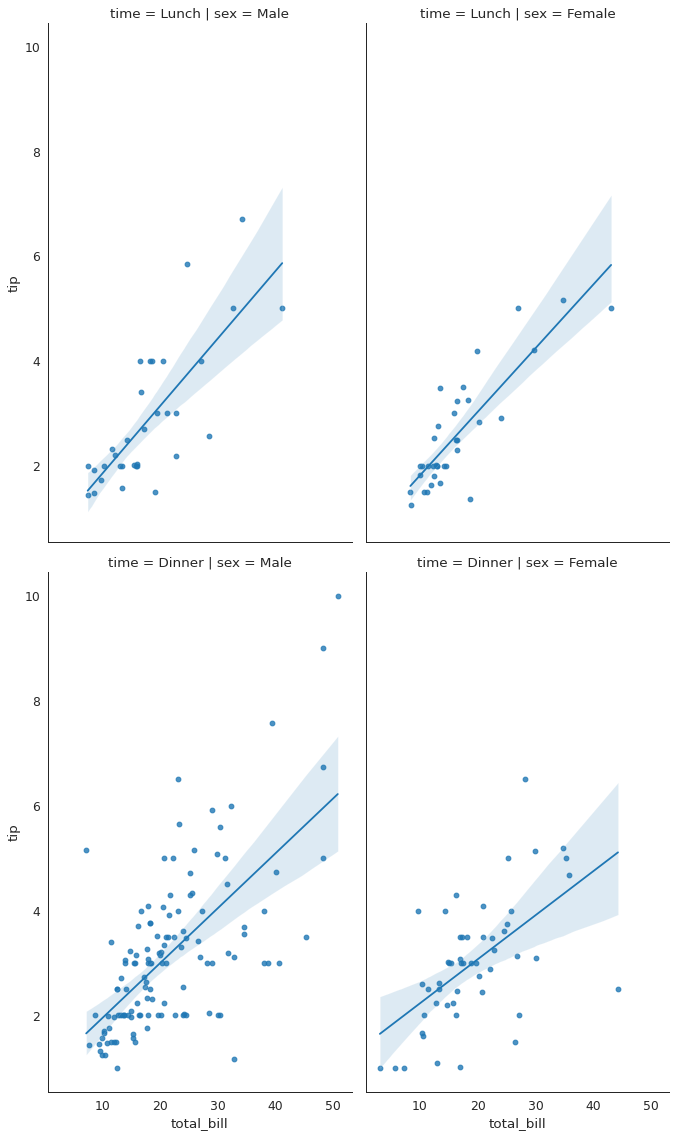

In [51]:
#même chose en séparant les colonnes

sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data = tips_df, height = 8, aspect=0.6 )